In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [4]:
boston = pd.read_csv("C:\\Aalesh and Mandar\\Datasets\\boston.csv")

In [5]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
scalar = StandardScaler()

In [9]:
scaled_boston = scalar.fit_transform(boston)
scaled_boston

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [10]:
km = KMeans(n_clusters=4, random_state = 100)
km.fit(scaled_boston)

KMeans(n_clusters=4, random_state=100)

In [11]:
labels = km.predict(scaled_boston)

In [12]:
boston["Cluster"] = labels

In [13]:
silhouette_score(scaled_boston, labels)

0.26410545024208093

In [14]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [15]:
boston.groupby("Cluster").mean()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Cluster,,,,,,,,,,,,,,
0,0.739010,8.169811,7.219811,0.301887,0.539053,7.446642,75.158491,3.047257,6.245283,302.811321,16.375472,385.867170,5.724906,38.116981
1,10.769990,0.000000,18.766604,0.056604,0.687899,5.927597,90.927673,2.003461,20.327044,627.987421,19.700000,295.371447,19.161761,15.794340
2,0.066263,54.541176,3.611294,0.011765,0.422881,6.718176,29.500000,6.981728,4.152941,305.788235,16.958824,389.073529,6.169882,28.805882
3,0.340740,3.258373,9.386172,0.043062,0.510933,6.085263,65.791866,4.051626,4.382775,309.459330,18.644976,382.731053,12.095072,21.155981


In [16]:
km.inertia_

3469.636952450432

In [17]:
wss = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_boston)
    wss.append(km.inertia_)

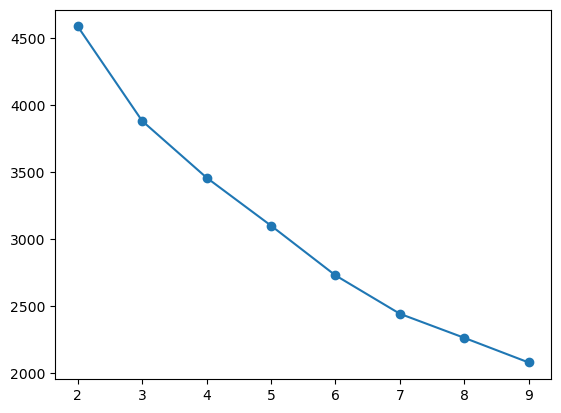

In [18]:
plt.scatter(np.arange(2,10), wss)
plt.plot(np.arange(2,10), wss)

In [19]:
sil = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_boston)
    labels = km.predict(scaled_boston)
    sil.append(silhouette_score(scaled_boston, labels))

In [20]:
ks = np.arange(2,10)
i_max = np.argmax(sil)
best_k = ks[i_max]
print("Best K = ",best_k)

Best K =  2
